In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\kjso3\AppData\Local\Temp\ipykernel_23672\82325636.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
pd.set_option('display.max_rows', None)

In [5]:
df = pd.read_csv('cel_df.csv', index_col=0)

가설 검정
===========

>  ### 셀럽 데이터에 RFM모델을 적용하여 상위 25% 단위로 나누어 R,F,M 각각 1점부터 4점까지 점수를 부여해 고객 세분화를 하기로 결정
>  ### 상위에서 25%씩 4분위로 자르기에 기준과 데이터가 적절한지 가설 검정을 통해 확인이 필요
>    > - __R(메시지 전송 날짜)__ :  셀럽의 가장 최근 메시지 전송 날짜의 분포가 가장 오래된 메시지부터 가장 최근 메시지까지 상위 25% 단위로 잘라   
점수를 산정해도 될만큼 골고루 분포해 있을 것이다.   
>    > - __F(메시지 총량)__ :  셀럽의 메시지 총량을 상위 25% 단위로 잘라 점수를 산정해도 될만큼 골고루 분포해 있을 것이다. 
>    > - __M(총 팔로워 수)__ :  셀럽의 총 팔로워 수를 상위 25% 단위로 잘라 점수를 산정해도 될만큼 골고루 분포해 있을 것이다.
>    > ### 위와 같은 3가지 가설 검정을 통해 고객 세분화 기준의 근거를 확인한다.

# 1. R(메시지 전송 날짜)
-  셀럽의 가장 최근 메시지 전송 날짜의 분포가 가장 오래된 메시지부터 가장 최근 메시지까지 상위 25% 단위로 잘라  
점수를 산정해도 될만큼 골고루 분포해 있을 것이다.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140031 entries, 0 to 541749
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   created_at         140031 non-null  object 
 1   message_count      140031 non-null  float64
 2   total_follower     140031 non-null  float64
 3   sender_id_secured  140031 non-null  object 
dtypes: float64(2), object(2)
memory usage: 5.3+ MB


In [7]:
df.head(5)

,created_at,message_count,total_follower,sender_id_secured
0,2022-02-27 01:03:05,2792.0,16620.0,wit****g_@dau*****
1,2022-02-27 01:03:06,2792.0,16620.0,wit****g_@dau*****
2,2022-03-01 13:43:28,2792.0,16620.0,wit****g_@dau*****
3,2022-03-01 22:03:24,2792.0,16620.0,wit****g_@dau*****
4,2022-03-01 22:03:32,2792.0,16620.0,wit****g_@dau*****


- 가장 최근 메시지 전송일 : 2022-09-17 23:59:39
- 가장 늦은 메시지 전송일 : 2022-02-27 01:03:05 

In [8]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [9]:
df['created_at'].min(), df['created_at'].max()

(Timestamp('2022-02-27 01:03:05'), Timestamp('2022-09-17 23:59:39'))

In [10]:
import copy
df2 = copy.deepcopy(df)

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140031 entries, 0 to 541749
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   created_at         140031 non-null  datetime64[ns]
 1   message_count      140031 non-null  float64       
 2   total_follower     140031 non-null  float64       
 3   sender_id_secured  140031 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 5.3+ MB


- resample함수 및 datetime 관련 함수를 사용하기 위해 index를 created_at 값으로 변경

In [12]:
df2.index = df2['created_at']

In [13]:
df2.head(10)

,created_at,message_count,total_follower,sender_id_secured
created_at,,,,
2022-02-27 01:03:05,2022-02-27 01:03:05,2792.0,16620.0,wit****g_@dau*****
2022-02-27 01:03:06,2022-02-27 01:03:06,2792.0,16620.0,wit****g_@dau*****
2022-03-01 13:43:28,2022-03-01 13:43:28,2792.0,16620.0,wit****g_@dau*****
2022-03-01 22:03:24,2022-03-01 22:03:24,2792.0,16620.0,wit****g_@dau*****
2022-03-01 22:03:32,2022-03-01 22:03:32,2792.0,16620.0,wit****g_@dau*****
2022-03-01 22:03:37,2022-03-01 22:03:37,2792.0,16620.0,wit****g_@dau*****
2022-03-02 23:04:45,2022-03-02 23:04:45,2792.0,16620.0,wit****g_@dau*****
2022-03-02 23:04:50,2022-03-02 23:04:50,2792.0,16620.0,wit****g_@dau*****
2022-03-02 23:04:55,2022-03-02 23:04:55,2792.0,16620.0,wit****g_@dau*****


- 셀럽 별 __가장 최근 메시지__를 기준으로 데이터프레임 생성

In [14]:
df3 = df.groupby('sender_id_secured')['created_at'].max().reset_index()

In [15]:
df3.head(211)

,sender_id_secured,created_at
0,0ga**a0@nav******,2022-09-14 18:53:12
1,2sa**am@gma******,2022-09-17 22:39:28
2,382**73@nav******,2022-09-11 23:56:54
3,595**15@nav******,2022-09-02 20:55:09
4,982***71@nav******,2022-09-17 19:29:33
5,MAM***44@gma******,2022-09-10 21:06:37
6,Npi****dy@gma******,2022-09-14 22:07:48
7,a03**14@nav******,2022-09-14 00:59:31
8,abx***17@gma******,2022-09-17 16:33:16
9,ado******te@gma******,2022-09-16 20:20:29


In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sender_id_secured  212 non-null    object        
 1   created_at         212 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 3.4+ KB


- 가장 최근 메시지를 보낸 시간이 가장 빠른 셀럽과 가장 느린 셀럽을 비교해 보았을 때 __약 3개월 차이__

In [17]:
df3['created_at'].min(), df3['created_at'].max()

(Timestamp('2022-06-20 03:30:05'), Timestamp('2022-09-17 23:59:39'))

In [18]:
df4 = copy.deepcopy(df3)

In [19]:
df4.index = df4['created_at']

In [20]:
week_sum = df4.resample('D').size()

- 일별로 나누어 셀럽의 가장 최근 보낸 메시지 시간의 분포를 살펴보니 총 212명 중 __9월 이후로도 메시지를 보낸 셀럽이 191명 그렇지 않은 셀럽이 21명__으로 파악됐다
- 또한 가장 빠른 일자인 9월 17일에 마지막으로 메시지를 보낸 셀럽이 212명중 113명으로 __전체 셀럽의 약 50%__에 해당한다.

### 따라서,  위에서 설계한 R(메시지 전송 날짜)에 해당하는 가설은 거짓 - 새로운 기준이 필요함

In [21]:
week_sum

created_at
2022-06-20      1
2022-06-21      0
2022-06-22      0
2022-06-23      0
2022-06-24      0
2022-06-25      0
2022-06-26      0
2022-06-27      0
2022-06-28      1
2022-06-29      1
2022-06-30      1
2022-07-01      0
2022-07-02      0
2022-07-03      0
2022-07-04      0
2022-07-05      0
2022-07-06      0
2022-07-07      0
2022-07-08      0
2022-07-09      0
2022-07-10      0
2022-07-11      0
2022-07-12      0
2022-07-13      0
2022-07-14      0
2022-07-15      0
2022-07-16      0
2022-07-17      0
2022-07-18      0
2022-07-19      0
2022-07-20      0
2022-07-21      0
2022-07-22      0
2022-07-23      0
2022-07-24      0
2022-07-25      0
2022-07-26      0
2022-07-27      2
2022-07-28      1
2022-07-29      0
2022-07-30      0
2022-07-31      2
2022-08-01      0
2022-08-02      1
2022-08-03      0
2022-08-04      0
2022-08-05      0
2022-08-06      2
2022-08-07      0
2022-08-08      1
2022-08-09      0
2022-08-10      0
2022-08-11      0
2022-08-12      0
2022-08-13      0

- 전체 기간 일별 분포도

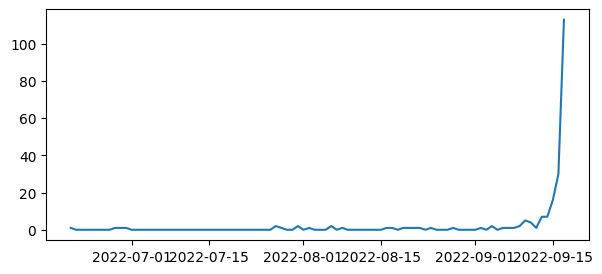

In [22]:
plt.figure(figsize=(7,3))
plt.plot(week_sum)
plt.show()

In [23]:
week_sum3 = df4['2022-09-16':'2022-09-17'].resample('H').size()

C:\Users\kjso3\AppData\Local\Temp\ipykernel_23672\1976199086.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  week_sum3 = df4['2022-09-16':'2022-09-17'].resample('H').size()


- 9/16 ~ 9/17 분포도

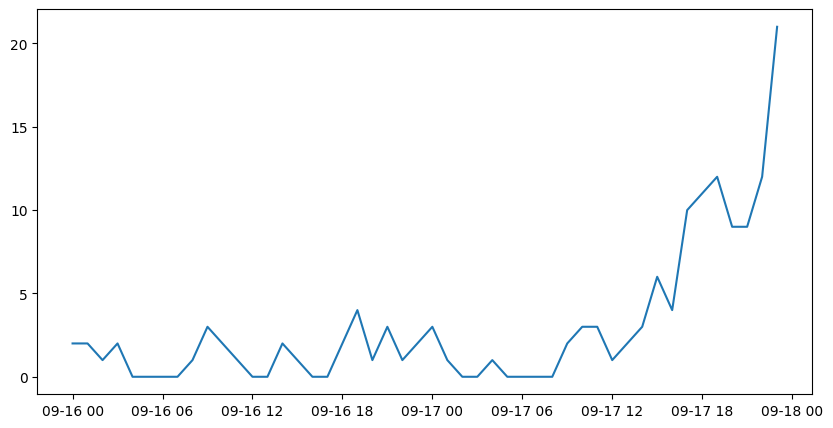

In [24]:
plt.figure(figsize=(10,5))
plt.plot(week_sum3)
plt.show()

- ### 새로운 가설(R) : 데이터 수집일 기준 가장 최근 한 달간 셀럽의 총 메시지 수를 기준으로 상위 25% 단위로 잘라 점수를 산정해도 될만큼 골고루 분포해 있을 것이다.

- __R,F,M__ 에 해당하는 가설을 모두 검증하기 위해 필요한 컬럼을 모아 하나의 데이터 프레임으로 통합하는 과정

In [25]:
r_df = copy.deepcopy(df2)

In [26]:
r_df['month'] = r_df['created_at'].dt.month

In [27]:
r_df.sample(5)

,created_at,message_count,total_follower,sender_id_secured,month
created_at,,,,,
2022-08-30 18:15:08,2022-08-30 18:15:08,678.0,9525.0,wew**81@gma******,8
2022-04-12 00:14:20,2022-04-12 00:14:20,1189.0,753.0,jin******a9@gma******,4
2022-03-22 01:14:11,2022-03-22 01:14:11,8637.0,1966.0,xxk*****xx@nav******,3
2022-08-01 20:20:53,2022-08-01 20:20:53,1280.0,8254.0,che***********an@gma******,8
2022-09-17 20:39:01,2022-09-17 20:39:01,954.0,3246.0,vip*****10@nav******,9


In [28]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140031 entries, 2022-02-27 01:03:05 to 2022-09-17 14:13:17
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   created_at         140031 non-null  datetime64[ns]
 1   message_count      140031 non-null  float64       
 2   total_follower     140031 non-null  float64       
 3   sender_id_secured  140031 non-null  object        
 4   month              140031 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 6.4+ MB


In [29]:
r_df[r_df['month']==9].groupby('sender_id_secured').size()

sender_id_secured
0ga**a0@nav******                         12
2sa**am@gma******                        256
382**73@nav******                        151
595**15@nav******                          8
982***71@nav******                        77
MAM***44@gma******                         4
Npi****dy@gma******                        1
a03**14@nav******                          1
abx***17@gma******                        32
ado******te@gma******                     61
alz****31@nav******                      688
amu*****28@gma******                      47
ana*******44@gma******                    30
ang***55@gma******                       126
ara**80@nav******                         86
ari*******ng@gma******                   722
asm****id@gma******                       95
bae***37@gma******                       124
ban*********15@gma******                 316
bbo*****rl@gma******                     186
bes**20@nav******                         40
bic****04@nav******                  

In [30]:
ss_df = r_df[r_df['month']==9].groupby('sender_id_secured').size().reset_index()

In [31]:
ss_df

,sender_id_secured,0
0,0ga**a0@nav******,12
1,2sa**am@gma******,256
2,382**73@nav******,151
3,595**15@nav******,8
4,982***71@nav******,77
5,MAM***44@gma******,4
6,Npi****dy@gma******,1
7,a03**14@nav******,1
8,abx***17@gma******,32
9,ado******te@gma******,61


In [32]:
tt_df = copy.deepcopy(df3)

In [33]:
rr_df = pd.merge(tt_df,ss_df, how='outer',on='sender_id_secured')

In [34]:
rr_df.columns = ['sender_id_secured', 'created_at', 'month_cnt']

In [35]:
rr_df = rr_df.fillna(0)

In [36]:
rr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 211
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sender_id_secured  212 non-null    object        
 1   created_at         212 non-null    datetime64[ns]
 2   month_cnt          212 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.6+ KB


In [37]:
rr_df = rr_df.astype({'month_cnt':'int'})

In [38]:
rr_df

,sender_id_secured,created_at,month_cnt
0,0ga**a0@nav******,2022-09-14 18:53:12,12
1,2sa**am@gma******,2022-09-17 22:39:28,256
2,382**73@nav******,2022-09-11 23:56:54,151
3,595**15@nav******,2022-09-02 20:55:09,8
4,982***71@nav******,2022-09-17 19:29:33,77
5,MAM***44@gma******,2022-09-10 21:06:37,4
6,Npi****dy@gma******,2022-09-14 22:07:48,1
7,a03**14@nav******,2022-09-14 00:59:31,1
8,abx***17@gma******,2022-09-17 16:33:16,32
9,ado******te@gma******,2022-09-16 20:20:29,61


In [39]:
df10 = df.groupby('sender_id_secured')['message_count'].max().reset_index()

In [40]:
df11 = df.groupby('sender_id_secured')['total_follower'].max().reset_index()

In [41]:
rr_df = pd.merge(rr_df,df10, how='outer',on='sender_id_secured')

In [42]:
rr_df = pd.merge(rr_df,df11, how='outer',on='sender_id_secured')

In [43]:
rr_df

,sender_id_secured,created_at,month_cnt,message_count,total_follower
0,0ga**a0@nav******,2022-09-14 18:53:12,12,198.0,2855.0
1,2sa**am@gma******,2022-09-17 22:39:28,256,3011.0,5537.0
2,382**73@nav******,2022-09-11 23:56:54,151,832.0,0.0
3,595**15@nav******,2022-09-02 20:55:09,8,8.0,0.0
4,982***71@nav******,2022-09-17 19:29:33,77,114.0,0.0
5,MAM***44@gma******,2022-09-10 21:06:37,4,5.0,5495.0
6,Npi****dy@gma******,2022-09-14 22:07:48,1,1.0,195000.0
7,a03**14@nav******,2022-09-14 00:59:31,1,1.0,0.0
8,abx***17@gma******,2022-09-17 16:33:16,32,32.0,1095.0
9,ado******te@gma******,2022-09-16 20:20:29,61,248.0,0.0


In [44]:
rr_df = rr_df.astype({'message_count':'int', 'total_follower':'int'})

In [45]:
rr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 211
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sender_id_secured  212 non-null    object        
 1   created_at         212 non-null    datetime64[ns]
 2   month_cnt          212 non-null    int32         
 3   message_count      212 non-null    int32         
 4   total_follower     212 non-null    int32         
dtypes: datetime64[ns](1), int32(3), object(1)
memory usage: 7.5+ KB


In [46]:
import seaborn as sns

In [63]:
x = rr_df['month_cnt']
x2 = rr_df['month_cnt'][rr_df['month_cnt']<3000]
x3 = rr_df['month_cnt'][rr_df['month_cnt']<1000]

<AxesSubplot: ylabel='month_cnt'>

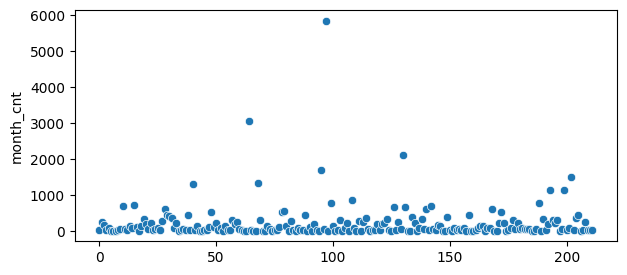

In [65]:
plt.figure(figsize=(7,3))
sns.scatterplot(x)

<AxesSubplot: ylabel='month_cnt'>

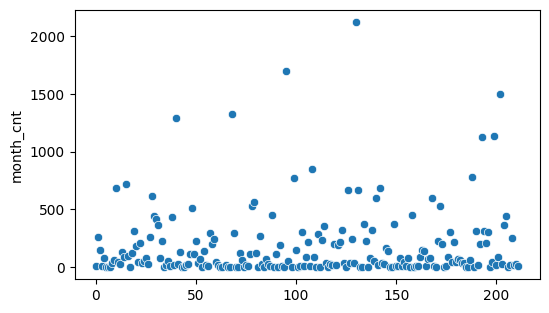

In [49]:
plt.figure(figsize=(6,3.5))
sns.scatterplot(x2)

<AxesSubplot: ylabel='month_cnt'>

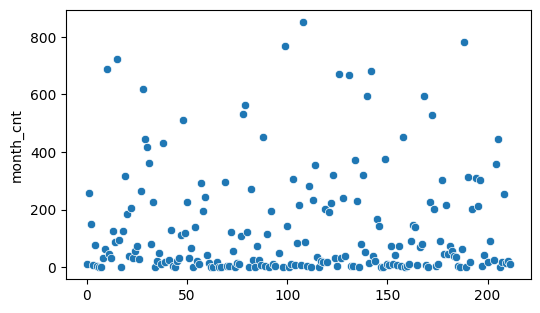

In [50]:
plt.figure(figsize=(6,3.5))
sns.scatterplot(x3)

In [51]:
x = rr_df['message_count']
x2 = rr_df['message_count'][rr_df['message_count']<2000]
x3 = rr_df['message_count'][rr_df['message_count']<1000]

<AxesSubplot: ylabel='message_count'>

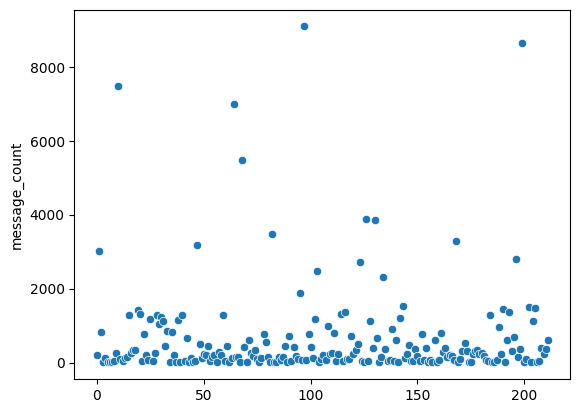

In [52]:
sns.scatterplot(x)

<AxesSubplot: ylabel='message_count'>

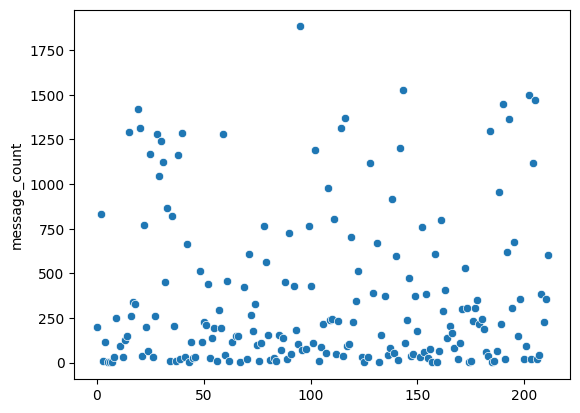

In [53]:
sns.scatterplot(x2)

<AxesSubplot: ylabel='message_count'>

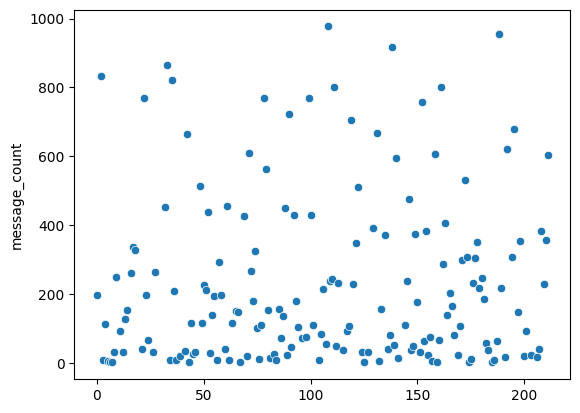

In [54]:
sns.scatterplot(x3)

In [55]:
x = rr_df['total_follower']
x2 = rr_df['total_follower'][rr_df['total_follower']<50000]
x3 = rr_df['total_follower'][rr_df['total_follower']<20000]
x4 = rr_df['total_follower'][rr_df['total_follower']<10000]

<AxesSubplot: ylabel='total_follower'>

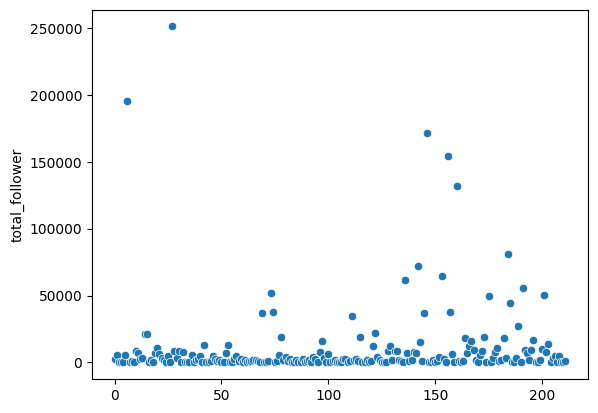

In [56]:
sns.scatterplot(x)

<AxesSubplot: ylabel='total_follower'>

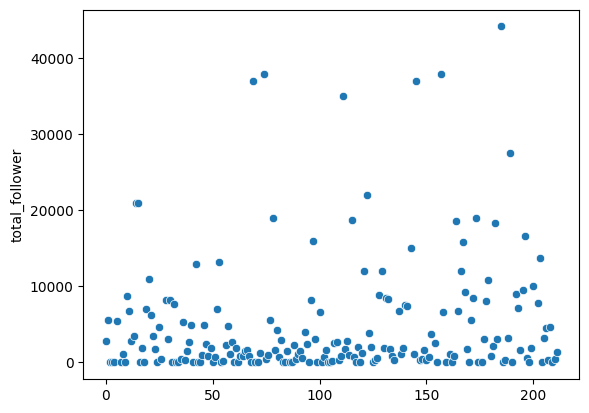

In [57]:
sns.scatterplot(x2)

<AxesSubplot: ylabel='total_follower'>

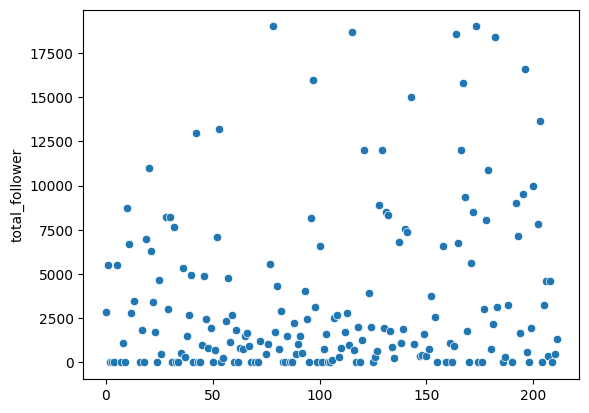

In [58]:
sns.scatterplot(x3)

<AxesSubplot: ylabel='total_follower'>

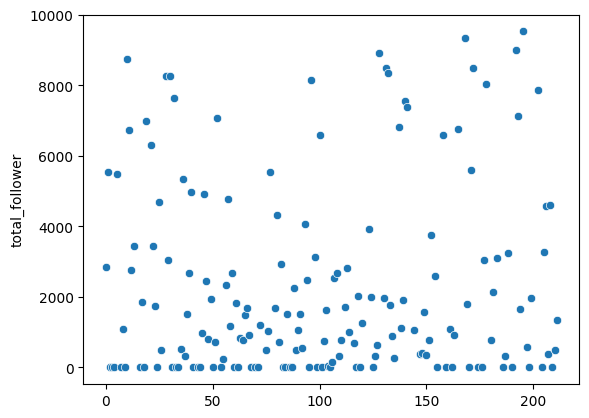

In [59]:
sns.scatterplot(x4)

In [60]:
week_s = df2.resample('W').size()

In [61]:
week_s

created_at
2022-02-27       16
2022-03-06      494
2022-03-13      922
2022-03-20     5613
2022-03-27     2519
2022-04-03     1210
2022-04-10     1293
2022-04-17      963
2022-04-24     1381
2022-05-01     1104
2022-05-08      675
2022-05-15      661
2022-05-22     1029
2022-05-29     1710
2022-06-05     1958
2022-06-12     1415
2022-06-19     1833
2022-06-26     2843
2022-07-03     2468
2022-07-10     2910
2022-07-17     3059
2022-07-24     3434
2022-07-31     8872
2022-08-07     8178
2022-08-14     7253
2022-08-21     9243
2022-08-28    12866
2022-09-04    16281
2022-09-11    18757
2022-09-18    19071
Freq: W-SUN, dtype: int64

- ## __1주일 단위 셀럽 메시지 분포 그래프__

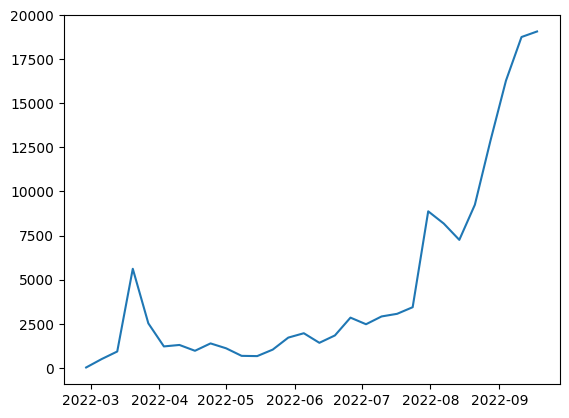

In [62]:
plt.plot(week_s)
plt.show()